In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X=mnist['data']
y=mnist['target']

In [ ]:
X.shape

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

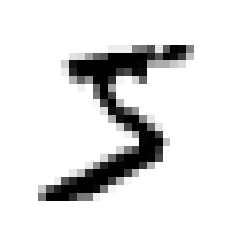

In [5]:
some_digit=X[0]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap='binary')
plt.axis("off")
plt.show()

In [ ]:
y[0]

In [6]:
y=y.astype(np.uint8)

In [7]:
X_train,y_train,X_test,y_test= X[:60000],y[:60000],X[60000:],y[60000:]

In [ ]:
#Training a binary classifier

In [8]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [10]:
from sklearn.linear_model import SGDClassifier

In [11]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_clf.predict([some_digit])

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

In [ ]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

In [ ]:
#SGDClassifier uses a decision function to give some score to a instance.If the score is above a certain threshold then the instance is predicted as positive

In [ ]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

In [ ]:
y_some_digit_pred=(y_scores>0)
y_some_digit_pred

In [ ]:
y_some_digit_pred=(y_scores>7000)
y_some_digit_pred

In [ ]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

In [ ]:
def plot_precision_recall_vs_thresholds(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="P")
    plt.plot(thresholds,recalls[:-1],"g-",label="R")
    plt.legend(loc="right")
    plt.xlabel("Thresholds")
    plt.grid(True)
plot_precision_recall_vs_thresholds(precisions,recalls,thresholds)
plt.show()

In [ ]:
y_prec_90=thresholds[np.argmax(precisions >=0.90)]
y_train_90=(y_scores>=y_prec_90)

In [ ]:
precision_score(y_train_5,y_train_90)

In [ ]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds =roc_curve(y_train_5,y_scores)

def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,label="given_problem")
    plt.plot([0,1],[0,1],'k--',label="random")
    plt.grid("True")
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.legend(loc="lower right")

In [ ]:
plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")
y_prediction_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3)

In [ ]:
print(y_probas_forest)

In [ ]:
y_forest_scores=y_probas_forest[:,1] #for getting probabilites of positive classes
fpr_forest,tpr_forest,thresholdsforest=roc_curve(y_train_5,y_forest_scores)

In [ ]:
plt.plot(fpr,tpr,"b:",label="SGD")
plt.plot(fpr_forest,tpr_forest,label="RFC")
plt.legend(loc="lower_right")
plt.xlabel("fpr");plt.ylabel("tpr")
plt.grid("True")
plt.show()

In [ ]:
roc_auc_score(y_train_5,y_forest_scores)

In [ ]:
precision_score(y_train_5,y_prediction_forest)

In [ ]:
recall_score(y_train_5,y_prediction_forest)

In [ ]:
#svm
from sklearn.svm import SVC
svm_clf =SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([some_digit])

In [ ]:
some_digit_scores=svm_clf.decision_function([some_digit])#default perofrms one vs one 
some_digit_scores

In [ ]:
#for one vs rest
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)
ovr_clf.predict([some_digit])


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")


In [12]:
#error analysis

y_train_pred=cross_val_predict(sgd_clf,X_train,y_train,cv=3)

In [13]:
from sklearn.metrics import confusion_matrix
conf_mx=confusion_matrix(y_train,y_train_pred)

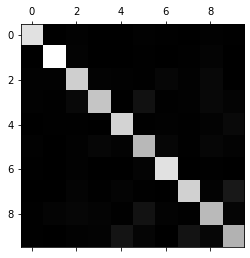

In [14]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [17]:
row_sum=conf_mx.sum(axis=1,keepdims=True)

In [20]:
norm_conf_mx=conf_mx/row_sum

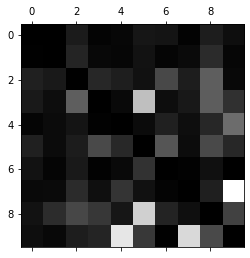

In [22]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)